# Reading Handwritten Digits with Deep Neural Networks
<img align="left" width="130" height="130" src="/images/mnist_digit0.png">  
## Part 1: Constructing a basic baseline model with Keras and TensorFlow
Overview of deep neural networks | Examine the MNIST handwritten digits dataset | Construct a baseline model using Keras and TensorFlow. 

<!-- TEASER_END -->

## Import the required python modules

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='once') # supress the repetition of warnings

## What is a Deep Neural Network?
A Deep Neural Network (DNN) is a type of artificial neural network inspired by biological neural systems. Essentially the data travels through layers of artificial neurons called nodes, to an output layer. During the supervised learning that we will do here; the state of these nodes is adjusted to reflect the probability that the outputs match the target labels of the training data. Each connection in the network has a weight value and each neuron has a bias value. The layers between the input and output layers are called hidden layers, typically a DNN will have many (5 - 100) hidden layers.
<img src="/images/DNN_diagram.png"> 
Fig. 1. Deep Neural Network architecture<sup>[1](#references)</sup>  
For a full history and description of DNN’ s see: https://en.wikipedia.org/wiki/Deep_learning

## What is the aim of this project?
The aim of this project is to discover through a set of experiments, how the architecture and hyperparameters of a Deep Neural Network affect its performance. The performance will be evaluated by measuring the accuracy of the DNN’s predictions and the time it takes to predict. Finally, the resulting model will be used to enter a machine learning competition to see how it performs against other models.


## The Data  
The data we are going to use to evaluate the Deep Neural Networks is the MNIST database of handwritten digits. The images are black and white and 28 x 28 pixels in size. The images have been preprocessed; the centre of mass of the images has been fixed to the centre of the image frame. The data is in the form of arrays with 784 features, i.e. the pixel value for each pixel of the  28 x 28 image. There are 70000 images in total.  
For full details of the data set used here see https://www.openml.org/d/554 

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### What does the imported data set look like?   
The data was received as two arrays loaded onto the variables X and y. X contains our image data and y contains the labels to describe each image that we will try to predict.

### X  values
The shape command below shows that there are 70000 images, which fits with the data described above. The 784 columns is due to the data having one column for each pixel. i.e. 28 x 28 = 784. The data is in the numpy array format and the values range from 0 to 255 for the pixel intensity.  

In [3]:
print(' X shape:', X.shape, '\n X type:', type(X), '\n Data:\n',
      X[:5], '\n X Max:', X.max(), '\n X Min', X.min())

 X shape: (70000, 784) 
 X type: <class 'numpy.ndarray'> 
 Data:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 X Max: 255.0 
 X Min 0.0


### The  y labels 
y contains our target label and only has a single column with the labels 0 to 9. Notice that the labels are text strings rather than numbers.

In [4]:
print(' y shape:', y.shape, '\n y type:', type(y), '\n Data:\n',
      y[:5], '\n y Max:', y.max(), '\n y Min', y.min())

 y shape: (70000,) 
 y type: <class 'numpy.ndarray'> 
 Data:
 ['5' '0' '4' '1' '9'] 
 y Max: 9 
 y Min 0


### What do the digit images look like?  
Let’s have a look at the first 10 digits, to show the data as an image it needs to be reshaped into a 28 x 28 array again.  
  
How many digits do we have of each class? This shows the balance of the data set and it is important to check that we have enough of each digit type when training the DNN. 
  
Distribution of the digit classes


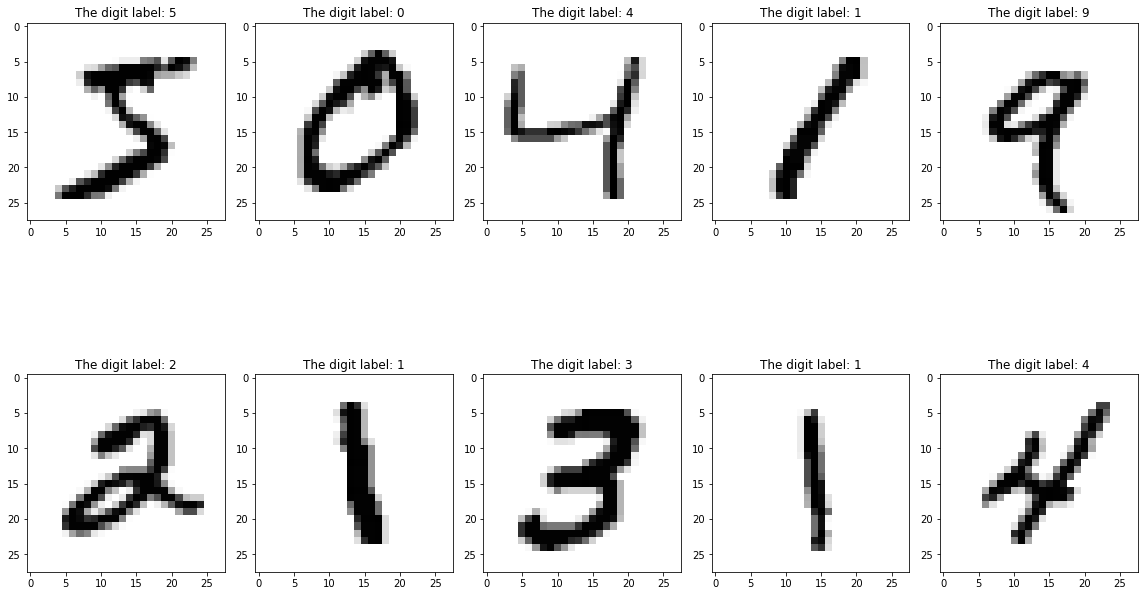

Fig. 2. What do the digit images look like?


In [5]:
# create a figure
fig = plt.figure(figsize=(16, 16))
# loop through the first 10 digits
for i in range(10):
    # put the 784 columns into a 28 x 28 format
    a_digit = X[i].reshape(28, 28)
    # arrange the plots
    ax = fig.add_subplot(2, 5, i+1)
    # plot using imshow with a greyscale colormap
    ax = plt.imshow(a_digit, cmap=matplotlib.cm.binary)
    # add the digit label to the title
    ax = plt.title('The digit label: {}'.format(y[i]))
    # get rid of the additional whitespace around the image
    fig.tight_layout()
plt.show()
print('Fig. 2. What do the digit images look like?')

## How many digits are in each class?
This shows the balance of the data set and it is important to check that we have enough of each digit type when training the DNN.

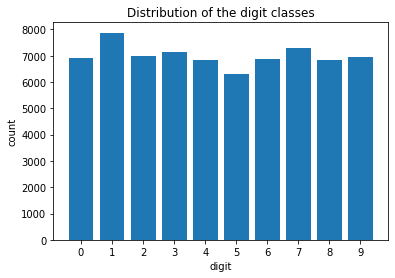

Fig. 3. How many digits are in each class?


In [6]:
# get the count of each value in the array
unique, counts = np.unique(y, return_counts=True)
# create a bar plot to show the counts
plt.bar(unique, counts)
# add the labels and the title
plt.xlabel('digit')
plt.ylabel('count')
plt.title('Distribution of the digit classes')
plt.show()
print('Fig. 3. How many digits are in each class?')

### Split the data into a training and validation set.  
In order to test the performance of the model, the images need to be split into a training and validation set (test set). To begin with, we will keep back 25% of the image data to evaluate the model's performance on data it has not been trained on; so we can evaluate any overfitting of the model to the training data. The term validation data set is often used for a portion of the training data held back, it is sometimes called the test data set, however, this name is normally used for test data with unseen labels such as in data science competitions. When the data is split it will also be stratified and shuffled to ensure that we maintain the even mix of digit types. The random_state attribute ensures that we can repeat exactly the same split, if the data split is repeated.

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.25,
                                                  random_state=42,
                                                  shuffle=True,
                                                  stratify=y)

### The y labels need to be converted to binary class matrices  
In order to easily compare the 10 output nodes to the y labels, we need the y data to be in a similar format. i.e. a value of 1 or 0 for each label. To do this we will use the Keras function to_categorical.  

In [8]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
print('Original label:', y_val[:1])
y_val = to_categorical(y_val, num_classes)
print('Binary matix:', y_val[:1])

Original label: ['4']
Binary matix: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Constructing a basic baseline model

I have found TensorFlow https://www.tensorflow.org/ to be a fast, accurate and an easy to use platform for creating machine learning models based on the neural network paradigm and the high-level API, Keras https://keras.io/  to be the easiest way to construct the DNN model we will build here.
A neural network would normally have more hidden layers, here we will start with just one hidden layer with 10 nodes, after the input layer to make a baseline model which can then be further optimised. The hidden layer will be a single Keras Sequential Dense layer with Rectified Linear Unit (ReLU) activation used to return a value. The term dense layer is used as each node is fully connected to every input value. ReLU activation has become the default activation function for most applications,  it returns 0 if the input is negative or a sum of the positive inputs. The final output layer will have 10 nodes to represent each possible digit. The output layer will be a Keras Sequential Dense layer with softmax activation. The softmax function takes the inputs to each node of the layer and turns these values are into a probability that sums to one. The softmax probability is then used to select the most likely output node to represent the predicted label. 


In [9]:
# use Keras Sequential to build the model
model = Sequential()

# add layer 1 with 10 nodes
model.add(Dense(10, input_dim=784,  activation='relu'))

# add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
# print a descritpion of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


The model summary table above describes the model and shows a count of the trainable parameters. 7960. This number comes from the connection weights of the 784 inputs x the 10 nodes + 10 bias weights that can be applied to each node giving the 7850 in the first row. Then the second row comes from the 10 outputs from the first layer to the 10 final output nodes + another 10 bias weights on these adding up to the 110 in the second row. Then the two rows are added together 7850 + 110 = 7960. So already, with our very simple DNN, there are a lot of parameters to adjust! 


### Train the model  
To begin with, we will use 10 training cycles called epochs to adjust the model weights. The model will be evaluated with an accuracy score both on the training data and the validation data that it has not been trained on. The performance history during the training epochs of the model will be collected and displayed in a graph. 

In [10]:
# Train the model
model_his = model.fit(X_train, y_train,
                      epochs=10,
                      validation_data=(X_val, y_val)
                      )

Train on 52500 samples, validate on 17500 samples
Epoch 1/10
52500/52500 [==============================] - 11s 200us/sample - loss: 2.8817 - accuracy: 0.1115 - val_loss: 2.3085 - val_accuracy: 0.1117
Epoch 2/10
52500/52500 [==============================] - 9s 169us/sample - loss: 2.1233 - accuracy: 0.1840 - val_loss: 1.9741 - val_accuracy: 0.2674
Epoch 3/10
52500/52500 [==============================] - 8s 159us/sample - loss: 1.8742 - accuracy: 0.2843 - val_loss: 1.7618 - val_accuracy: 0.3206
Epoch 4/10
52500/52500 [==============================] - 8s 154us/sample - loss: 1.7133 - accuracy: 0.3423 - val_loss: 1.6640 - val_accuracy: 0.3590
Epoch 5/10
52500/52500 [==============================] - 9s 163us/sample - loss: 1.6166 - accuracy: 0.3625 - val_loss: 1.6015 - val_accuracy: 0.3809
Epoch 6/10
52500/52500 [==============================] - 9s 166us/sample - loss: 1.5403 - accuracy: 0.3837 - val_loss: 1.5216 - val_accuracy: 0.3926
Epoch 7/10
52500/52500 [=========================

## Plot the Training History  
Here we create a function to plot the training history. The function will be stored (cut and pasted into a class Src) in another file called Src.py (src short for source) that I will use to keep repeated functions for use in the rest of the notebooks in this series. To have a look at Src.py follow the original site link at the top of the post.

In [11]:
def plot_results(acc, val_acc, fig_no):
    """Plot the training history data"""
    # Plot train vs test accuracy per epoch
    plt.figure()

    # Use the history metrics
    plt.plot(acc)
    plt.plot(val_acc)

    # add some labels
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'])
    plt.ylim(0, 1)  # set to highest possible value to

    # the highest accuracy score
    print('\n Fig {}. The highest validation score:{:.3f} | The highest training score {:.3f}'.format(
        fig_no, max(val_acc), max(acc)))
    plt.show()
    # keep a record of the results
    return (max(acc), max(val_acc))


 Fig 4. The highest validation score:0.612 | The highest training score 0.603


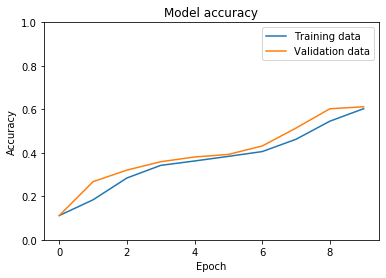

In [12]:
# plot the results and collect the data in a variable
exp1 = plot_results(model_his.history['accuracy'], model_his.history['val_accuracy'], 4)

### How long does the model take to predict digits?
Let’s see how long the model takes to make it predictions for different batch sizes of inputted images

In [15]:
# create a list of input batch sizes
samples = [1, 10, 100, 1000, 10000]
# repeat the predictions for each batch size and show the run time
for s in samples:
    print('Time to predict {} digits:'.format(s))
    %timeit model.predict(X_val[:s])

Time to predict 1 digits:
52.3 ms ± 8.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time to predict 10 digits:
41.6 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time to predict 100 digits:
49.1 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time to predict 1000 digits:
95.6 ms ± 8.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time to predict 10000 digits:
526 ms ± 7.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Part 1. Results  
As you can see the model got more accurate with each training epoch. The model did not perform particularly well with a maximum accuracy of around 60%, as expected for this baseline model. The model will be improved in the following posts of this series; starting with scaling the data in the next post. The validation score and the training score were very similar demonstrating that the model was not overfitting to the training data.   
The timing results show that the model requires around 40ms to get started and interestingly it is far more time-efficient to pass it large batches of input data than small ones. In a future post, I will also examine the memory usage of the model.


## Using the model  
How do we go about actually using the model built here? Below is the code to feed a single digit into the model and see how it performs. A digit was selected at random (index = 17) by me for demonstration purposes - you could play around with this and select any X value to feed it. Note the numpy function argmax() is used here to give the index of the maximum value of the output array and the y input array to convert back from the categorical matrix to a single label value for the digit.

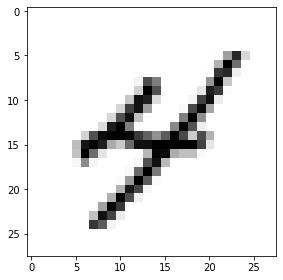

The original digit label: 4
The predicted label: 9


In [14]:
# print a the selected digit image
fig = plt.figure(figsize=(4,4))
a_digit = X_val[17].reshape(28, 28)
plt.imshow(a_digit, cmap=matplotlib.cm.binary)
fig.tight_layout()
plt.show()
# print the selected digits label
print('The original digit label:', np.argmax(y_val[17]))
# print the selected digits prediction
print('The predicted label:', np.argmax(model.predict(X_val[17:18])))

The model got this digit wrong. Lets have a look at the output values to see what is going on

In [17]:
model.predict(X_val[17:18])

array([[0.00152033, 0.00318356, 0.00548032, 0.01648142, 0.31346008,
        0.03493109, 0.12505329, 0.15036301, 0.03139669, 0.31813017]],
      dtype=float32)

You can see from the output probabilities that the model was split between a 4 at 31.3% and a 9 at 31.8% with the 9 just winning!

## Conclusion
It was easy to build a predictive model for pattern recognition with Keras and TensorFlow. The baseline model has room for improvement and the steps for improving the model will be the basis of the next posts in this series starting with evaluating the effect of scaling the data in the next post. Follow the Original Site link at the top of the post to download the source files used in this post.

## References  
1) Lie, B.R. and Kalmar, A.N.H., 2018. Deep Reinforcement Learning and Generative Adversarial Networks for Abstractive Text Summarization (Master's thesis, NTNU).


notebook version 1.191106